In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt

In [3]:
import sklearn
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
confirmed_cases=pd.read_csv('time_series_covid19_confirmed_global.csv')

In [6]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,853,853,853,853,854,854,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,113,118,130,138,140,142,148,155,166,172


In [7]:
deceased_cases=pd.read_csv('time_series_covid19_deaths_global.csv')

In [8]:
deceased_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,405,426,446,451,471,478,491,504,546,548
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,34,35,36,36,36,36,37,38,39,42
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,732,741,751,760,767,777,788,799,811,825
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,5,6,6,6,6,7,8,8


In [9]:
recovered_cases=pd.read_csv('time_series_covid19_recovered_global.csv')

In [10]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,980,1001,1034,1039,1044,1055,1064,1077,1086,1114
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,759,780,781,781,781,789,789,791,792,792
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,40,41,42,61,61,64,64,64,64,66


In [11]:
cols=confirmed_cases.keys()

In [12]:
print(cols)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/10/20', '6/11/20', '6/12/20', '6/13/20', '6/14/20', '6/15/20',
       '6/16/20', '6/17/20', '6/18/20', '6/19/20'],
      dtype='object', length=154)


In [13]:
confirmed=confirmed_cases.loc[:,cols[4]:cols[-1]]

In [14]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,0,0,0,0,0,0,0,0,0,0,...,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878
1,0,0,0,0,0,0,0,0,0,0,...,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838
2,0,0,0,0,0,0,0,0,0,0,...,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504
3,0,0,0,0,0,0,0,0,0,0,...,852,852,853,853,853,853,854,854,855,855
4,0,0,0,0,0,0,0,0,0,0,...,113,118,130,138,140,142,148,155,166,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,611,632,639,659,661,662,671,683,688,693
262,0,0,0,0,0,0,0,0,0,0,...,560,591,632,705,728,844,885,902,909,919
263,0,0,0,0,0,0,0,0,0,0,...,162,162,163,176,176,176,197,197,210,210
264,0,0,0,0,0,0,0,0,0,0,...,4763,4834,4902,4971,5035,5097,5160,5221,5279,5338


In [15]:
recovered=recovered_cases.loc[:,cols[4]:cols[-1]]
recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,0,0,0,0,0,0,0,0,0,0,...,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962
1,0,0,0,0,0,0,0,0,0,0,...,980,1001,1034,1039,1044,1055,1064,1077,1086,1114
2,0,0,0,0,0,0,0,0,0,0,...,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196
3,0,0,0,0,0,0,0,0,0,0,...,759,780,781,781,781,789,789,791,792,792
4,0,0,0,0,0,0,0,0,0,0,...,40,41,42,61,61,64,64,64,64,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0,0,0,0,0,0,0,0,0,0,...,135,146,156,176,177,177,182,188,191,199
249,0,0,0,0,0,0,0,0,0,0,...,23,23,28,39,53,79,91,271,273,288
250,0,0,0,0,0,0,0,0,0,0,...,97,97,97,114,114,114,127,127,129,129
251,0,0,0,0,0,0,0,0,0,0,...,2947,3062,3158,3288,3409,3503,3624,3700,3762,3830


In [16]:
deceased=deceased_cases.loc[:,cols[4]:cols[-1]]
deceased

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,0,0,0,0,0,0,0,0,0,0,...,405,426,446,451,471,478,491,504,546,548
1,0,0,0,0,0,0,0,0,0,0,...,34,35,36,36,36,36,37,38,39,42
2,0,0,0,0,0,0,0,0,0,0,...,732,741,751,760,767,777,788,799,811,825
3,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,52,52,52,52
4,0,0,0,0,0,0,0,0,0,0,...,4,5,5,6,6,6,6,7,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
262,0,0,0,0,0,0,0,0,0,0,...,129,136,139,160,164,208,214,244,248,251
263,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,5,5
264,0,0,0,0,0,0,0,0,0,0,...,48,49,49,50,50,50,50,51,51,51


In [17]:
dates=confirmed.keys()

In [18]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/10/20', '6/11/20', '6/12/20', '6/13/20', '6/14/20', '6/15/20',
       '6/16/20', '6/17/20', '6/18/20', '6/19/20'],
      dtype='object', length=150)

In [19]:
world_cases=[]
total_deaths=[]
total_recovered=[]
india_cases=[]
death_rate=[]


In [20]:
for i in dates:
    confirmed_sum=confirmed[i].sum()
    recovered_sum=recovered[i].sum()
    death_sum=deceased[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    death_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())

In [ ]:
print(confirmed_sum)

In [ ]:
print(death_sum)

In [ ]:
print(recovered_sum)

In [ ]:
print(india_cases)

In [ ]:
print(total_deaths)

In [ ]:
print(world_cases)

In [ ]:
print(death_rate)

In [21]:
c=1
day_dates=[]
for i in range(len(dates)):
    c=i*1
    day_dates.append(c)
day_dates

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149]

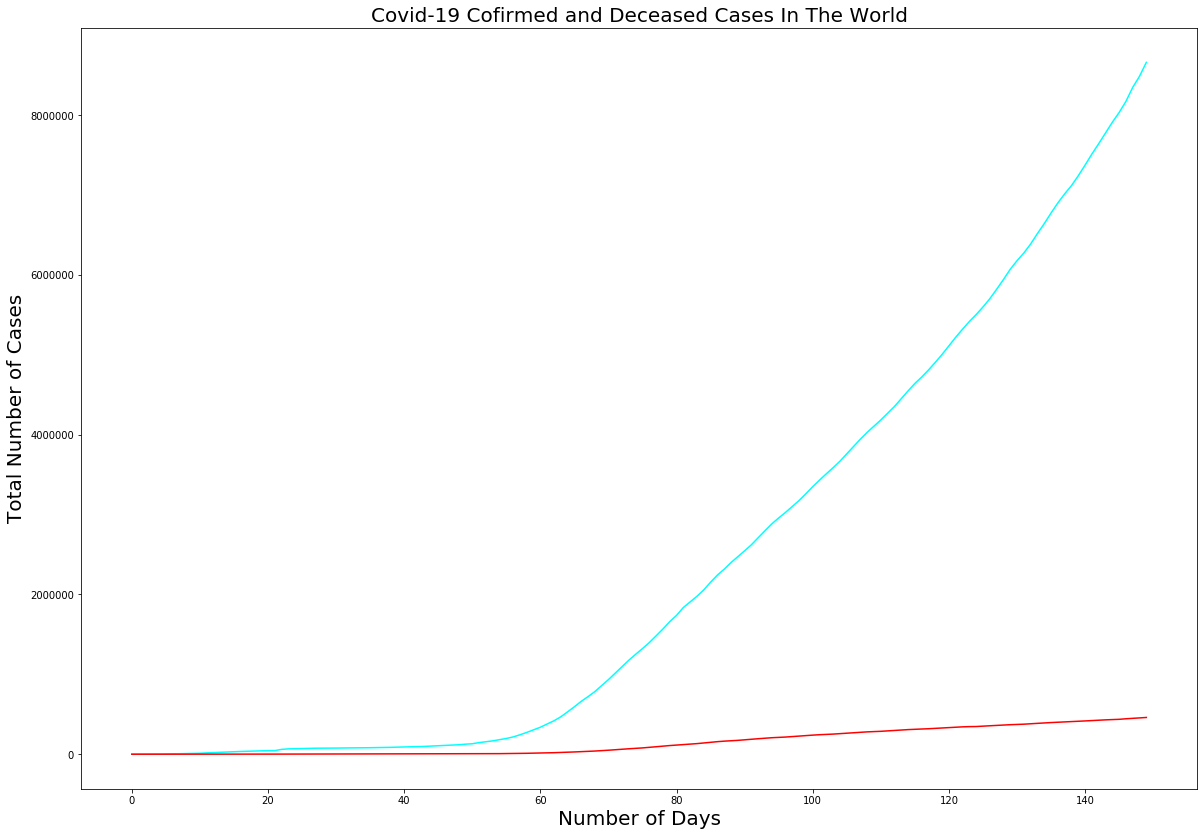

In [22]:
plt.figure(figsize=(20,14))
plt.plot(day_dates,world_cases,color='cyan')
plt.plot(day_dates,total_deaths,color='red')
plt.title('Covid-19 Cofirmed and Deceased Cases In The World',size=20)
plt.xlabel('Number of Days',size=20)
plt.ylabel('Total Number of Cases',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

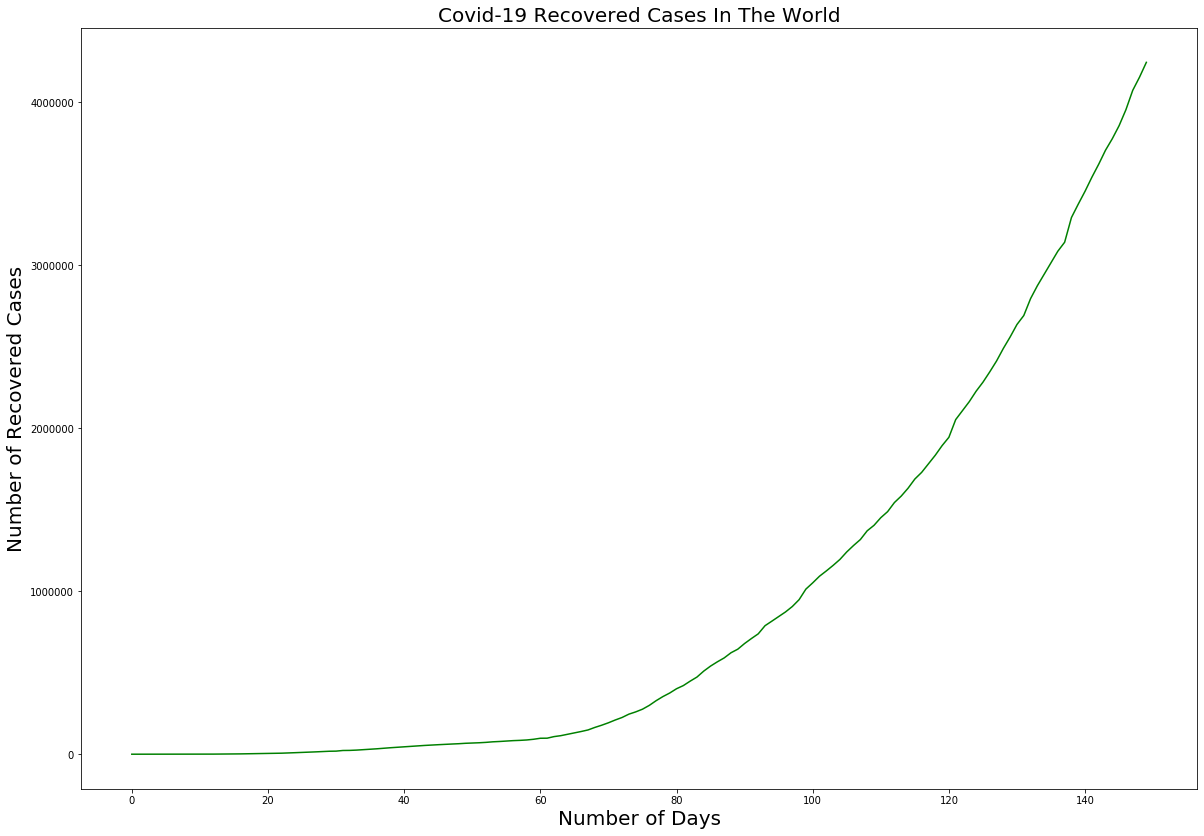

In [23]:
plt.figure(figsize=(20,14))
plt.plot(day_dates,total_recovered,color='green')
plt.title('Covid-19 Recovered Cases In The World',size=20)
plt.xlabel('Number of Days',size=20)
plt.ylabel('Number of Recovered Cases',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [24]:
def increase_eachday(records):
    d=[]
    for i in range(len(records)):
        if i==0:
            d.append(records[0])
        else:
            d.append(records[i]-records[i-1])
    return d

In [25]:
world_daily_increase=increase_eachday(world_cases)
world_daily_increase

[555,
 99,
 287,
 493,
 684,
 809,
 2651,
 588,
 2068,
 1693,
 2111,
 4749,
 3094,
 4011,
 3743,
 3159,
 3597,
 2729,
 3030,
 2612,
 2040,
 419,
 15147,
 6517,
 2145,
 2194,
 2034,
 1878,
 503,
 558,
 622,
 1753,
 386,
 567,
 847,
 974,
 1358,
 1366,
 1897,
 2358,
 1937,
 2533,
 2280,
 2769,
 3917,
 4021,
 3972,
 3782,
 4839,
 7329,
 5205,
 14295,
 11079,
 10739,
 14430,
 15465,
 19244,
 26923,
 29614,
 32146,
 32753,
 40784,
 40188,
 49586,
 61983,
 64040,
 67366,
 59151,
 62885,
 74737,
 75588,
 80808,
 82480,
 80254,
 73676,
 71475,
 74939,
 83953,
 85933,
 92251,
 78139,
 98802,
 70077,
 70595,
 80297,
 95994,
 88959,
 74054,
 82860,
 72813,
 74641,
 75845,
 88885,
 87429,
 85356,
 73932,
 68863,
 73863,
 75518,
 84854,
 88465,
 82135,
 79107,
 76717,
 80761,
 92201,
 91059,
 93107,
 85361,
 77907,
 76568,
 83409,
 84964,
 97915,
 97423,
 93178,
 80241,
 88347,
 95878,
 99568,
 106605,
 108219,
 100437,
 96332,
 86970,
 94892,
 102897,
 118140,
 121685,
 128946,
 107976,
 96386,
 1

In [26]:
world_daily_recovered=increase_eachday(total_recovered)
world_daily_recovered

[28,
 2,
 6,
 3,
 13,
 9,
 46,
 19,
 17,
 79,
 62,
 188,
 151,
 229,
 272,
 363,
 524,
 605,
 628,
 702,
 737,
 467,
 1145,
 1763,
 1337,
 1470,
 1718,
 1769,
 1769,
 2056,
 713,
 3996,
 508,
 1833,
 2678,
 2479,
 2893,
 3434,
 3071,
 2934,
 2886,
 2626,
 2942,
 2626,
 2069,
 2494,
 2335,
 1799,
 1911,
 2598,
 1321,
 1927,
 2371,
 3410,
 2054,
 2752,
 2483,
 1637,
 2445,
 4264,
 6215,
 465,
 9639,
 5783,
 8365,
 8769,
 8494,
 9467,
 15437,
 13486,
 15090,
 17041,
 15447,
 20413,
 13839,
 16633,
 23388,
 28716,
 25336,
 21819,
 26247,
 19403,
 27166,
 25093,
 36667,
 30828,
 26120,
 23923,
 31654,
 22002,
 34827,
 30429,
 28791,
 50033,
 27779,
 28603,
 27803,
 33266,
 42168,
 64971,
 38231,
 40917,
 32323,
 34064,
 36605,
 45918,
 39497,
 36522,
 53549,
 33594,
 46994,
 37035,
 55842,
 39735,
 47989,
 56591,
 40886,
 52898,
 52165,
 58913,
 51265,
 108651,
 54971,
 55440,
 63723,
 55214,
 63393,
 66857,
 77327,
 70472,
 76308,
 54895,
 104123,
 79142,
 70029,
 69156,
 72202,
 55093,
 1

In [27]:
world_daily_deaths=increase_eachday(total_deaths)
world_daily_deaths

[17,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 103,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 253,
 152,
 143,
 104,
 98,
 139,
 115,
 125,
 4,
 207,
 11,
 160,
 79,
 62,
 44,
 58,
 69,
 55,
 89,
 75,
 94,
 93,
 112,
 99,
 243,
 186,
 276,
 347,
 303,
 498,
 420,
 640,
 680,
 806,
 895,
 1106,
 1481,
 1702,
 1699,
 1918,
 2268,
 2773,
 3001,
 3508,
 3682,
 3466,
 4148,
 4836,
 5528,
 6283,
 5962,
 5831,
 4987,
 5831,
 7903,
 6692,
 7586,
 7243,
 6021,
 5700,
 5723,
 6891,
 8265,
 7271,
 8865,
 6430,
 4531,
 5398,
 7094,
 6699,
 6752,
 6340,
 6193,
 3733,
 4555,
 6362,
 6883,
 5695,
 5255,
 5187,
 3668,
 4093,
 5722,
 6584,
 5709,
 5345,
 4411,
 3425,
 3611,
 5622,
 5220,
 5274,
 5185,
 4152,
 3396,
 3307,
 4809,
 4821,
 4809,
 5293,
 3980,
 2847,
 1171,
 4224,
 5183,
 4696,
 4694,
 4112,
 2881,
 3529,
 4697,
 5699,
 5174,
 4822,
 3813,
 2749,
 3744,
 4861,
 5209,
 4791,
 4319,
 4267,
 3344,
 3508,
 6786,
 5274,
 5022,
 6024]

In [28]:
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [ ]:
print(world_cases.shape)

In [29]:
day_dates=np.array(day_dates).reshape(-1,1)

In [30]:
print(day_dates.shape)

(150, 1)


In [31]:
days_in_future=20
future_forecast=np.array([i for i in range(len(day_dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-20]

In [32]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [33]:
adjusted_dates

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
future_forecast.shape

In [ ]:
adjusted_dates.shape


In [34]:
x_train_confirmed,x_test_confirmed,y_train_confirmed,y_test_confirmed=train_test_split(day_dates,world_cases,test_size=0.25,shuffle=False)

In [35]:
model=LinearRegression()
model.fit(x_train_confirmed,y_train_confirmed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
test_predict=model.predict(x_test_confirmed)

In [37]:
predicttions=model.predict(future_forecast)

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
mean_squared_error(test_predict,y_test_confirmed)

6978327596036.09

In [40]:
mean_absolute_error(test_predict,y_test_confirmed)

2496903.7952391147

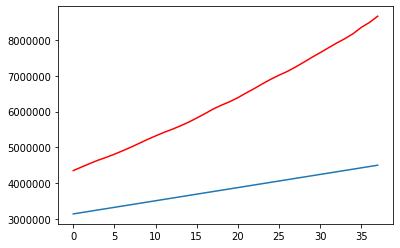

In [41]:
plt.plot(y_test_confirmed,color='red')
plt.plot(test_predict)

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly=PolynomialFeatures(degree=3)
poly_x_train_confirmed=poly.fit_transform(x_train_confirmed)
poly_x_test_confirmed=poly.fit_transform(x_test_confirmed)
poly_future_forecast=poly.fit_transform(future_forecast)

In [44]:
model=LinearRegression()
model.fit(poly_x_train_confirmed,y_train_confirmed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
test_predict=model.predict(poly_x_test_confirmed)

In [46]:
predicttions=model.predict(poly_future_forecast)

In [47]:
mean_squared_error(test_predict,y_test_confirmed)

1662768387820.9333

In [48]:
mean_absolute_error(test_predict,y_test_confirmed)

1162959.85139995

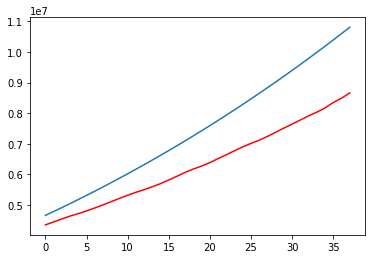

In [49]:
plt.plot(y_test_confirmed,color='red')
plt.plot(test_predict)